<a href="https://colab.research.google.com/github/nicolasvazquez95/Aprendiendo_DeepLearning/blob/main/02_CLF_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercises 🛠

1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model. 
3. Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize it and then build a model to fit it at over 85% accuracy.
4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.
5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
# 2
model = keras.Sequential([
                          keras.layers.Dense(6,activation='relu',input_shape=(None,1)),
                          keras.layers.Dense(6,activation='relu'),
                          keras.layers.Dense(6,activation='relu'),
                          keras.layers.Dense(6,activation='relu'),
                          keras.layers.Dense(6,activation='relu'),
                          keras.layers.Dense(2,activation='sigmoid')
]
)
model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 6)           12        
                                                                 
 dense_1 (Dense)             (None, None, 6)           42        
                                                                 
 dense_2 (Dense)             (None, None, 6)           42        
                                                                 
 dense_3 (Dense)             (None, None, 6)           42        
                                                                 
 dense_4 (Dense)             (None, None, 6)           42        
                                                                 
 dense_5 (Dense)             (None, None, 2)           14        
                                                                 
Total params: 194
Trainable params: 194
Non-trainable pa

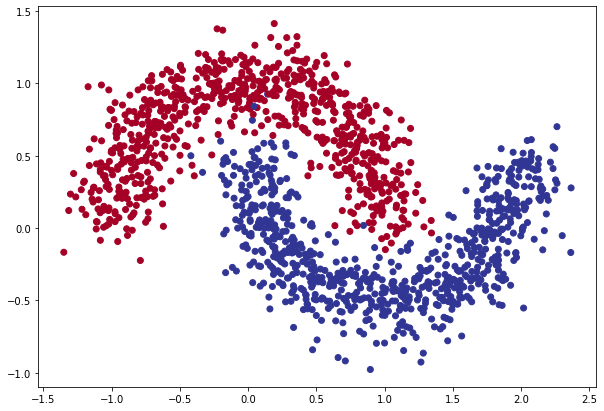

In [ ]:
# 3
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1500,noise=0.15,random_state=42)

# Visualize the dataset 
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
X[0].shape

(2,)

In [ ]:
## Build the model 
model_circles = tf.keras.models.Sequential([
                                            tf.keras.layers.Dense(10,activation='relu'),
                                            tf.keras.layers.Dense(10,activation='relu'),
                                            tf.keras.layers.Dense(1,activation='sigmoid')                                                
])

model_circles.compile(loss=tf.keras.losses.binary_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

history = model_circles.fit(X,y,epochs=100,
                            callbacks=[tf.keras.callbacks.EarlyStopping(patience=15)],
                            validation_split=0.3)

Epoch 1/100
33/33 [==============================] - 1s 12ms/step - loss: 0.7322 - accuracy: 0.1419 - val_loss: 0.7061 - val_accuracy: 0.2644
Epoch 2/100
33/33 [==============================] - 0s 6ms/step - loss: 0.6865 - accuracy: 0.4743 - val_loss: 0.6632 - val_accuracy: 0.6400
Epoch 3/100
33/33 [==============================] - 0s 6ms/step - loss: 0.6443 - accuracy: 0.6990 - val_loss: 0.6165 - val_accuracy: 0.8089
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 0.5973 - accuracy: 0.8143 - val_loss: 0.5649 - val_accuracy: 0.8289
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 0.5448 - accuracy: 0.8305 - val_loss: 0.5090 - val_accuracy: 0.8489
Epoch 6/100
33/33 [==============================] - 0s 6ms/step - loss: 0.4889 - accuracy: 0.8495 - val_loss: 0.4559 - val_accuracy: 0.8644
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 0.4349 - accuracy: 0.8629 - val_loss: 0.4085 - val_accuracy: 0.8689
Epoch 8/100


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


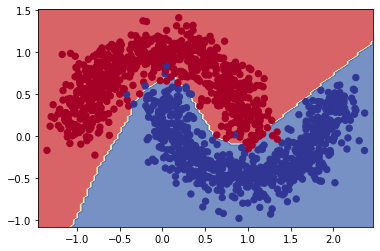

In [ ]:
plot_decision_boundary(model_circles, X, y)

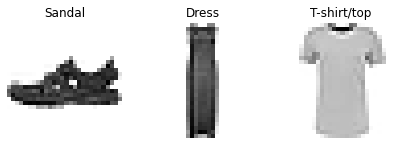

In [ ]:
# 4
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  rand_index = random.choice(range(len(train_images)))
  plt.imshow(train_images[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
# 5
model_mnist = tf.keras.models.Sequential([
                                         tf.keras.layers.Flatten(input_shape=(28,28)),
                                         tf.keras.layers.Dense(200,activation='relu'),
                                         tf.keras.layers.Dense(200,activation='relu'),
                                         tf.keras.layers.Dense(100,activation='relu'),
                                         tf.keras.layers.Dense(10,activation='softmax')
])
model_mnist.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

## Find ideal learning rate for the task
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch/20))

## Fit the model
find_lr_history = model_mnist.fit(train_images,train_labels,
                               epochs=100,validation_data=(test_images, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/100
1875/1875 [==============================] - 7s 4ms/step - loss: 11.7202 - accuracy: 0.5851 - val_loss: 4.8724 - val_accuracy: 0.6875 - lr: 1.0000e-05
Epoch 2/100
1875/1875 [==============================] - 7s 3ms/step - loss: 3.7888 - accuracy: 0.7275 - val_loss: 3.2371 - val_accuracy: 0.7334 - lr: 1.1220e-05
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6281 - accuracy: 0.7615 - val_loss: 2.4221 - val_accuracy: 0.7589 - lr: 1.2589e-05
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9995 - accuracy: 0.7810 - val_loss: 2.0228 - val_accuracy: 0.7687 - lr: 1.4125e-05
Epoch 5/100
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6085 - accuracy: 0.7968 - val_loss: 1.6758 - val_accuracy: 0.7862 - lr: 1.5849e-05
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3216 - accuracy: 0.8077 - val_loss: 1.4778 - val_accuracy: 0.7988 - lr: 1.7783e-05
Epoch 7/100
1875/1875 [====

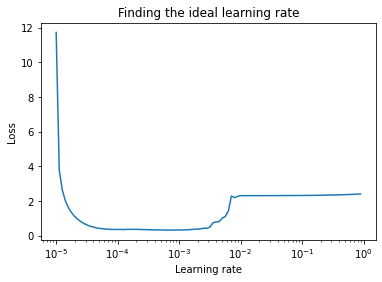

In [ ]:
lrs = 1e-5 * (10**(np.arange(100)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# 5
tf.random.set_seed(42)

model_mnist = tf.keras.models.Sequential([
                                         tf.keras.layers.Flatten(input_shape=(28,28)),
                                         tf.keras.layers.Dense(200,activation='relu'),
                                         tf.keras.layers.Dense(200,activation='relu'),
                                         tf.keras.layers.Dense(100,activation='relu'),
                                         tf.keras.layers.Dense(10,activation='softmax')
])
model_mnist.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch/15))

history = model_mnist.fit(train_images,train_labels,
                               epochs=50,validation_data=(test_images, test_labels),
                               callbacks=[tf.keras.callbacks.EarlyStopping(patience=25),
                                          lr_scheduler])

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2539 - accuracy: 0.7606 - val_loss: 0.6450 - val_accuracy: 0.7658 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4805 - accuracy: 0.8279 - val_loss: 0.5320 - val_accuracy: 0.8193 - lr: 8.5770e-04
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4256 - accuracy: 0.8478 - val_loss: 0.4703 - val_accuracy: 0.8305 - lr: 7.3564e-04
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3855 - accuracy: 0.8622 - val_loss: 0.4397 - val_accuracy: 0.8471 - lr: 6.3096e-04
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3551 - accuracy: 0.8712 - val_loss: 0.4146 - val_accuracy: 0.8552 - lr: 5.4117e-04
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3300 - accuracy: 0.8783 - val_loss: 0.4197 - val_accuracy: 0.8483 - lr: 4.6416e-04
Epoch 7/50
1875/1875 [================

In [ ]:
model_mnist.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4711 - accuracy: 0.8863


[0.4710802137851715, 0.8863000273704529]

In [ ]:
model_mnist = tf.keras.models.Sequential([
                                         tf.keras.layers.Flatten(input_shape=(28,28)),
                                         tf.keras.layers.Dense(300,activation='relu'),
                                         tf.keras.layers.Dense(200,activation='relu'),
                                         tf.keras.layers.Dense(100,activation='relu'),
                                         tf.keras.layers.Dense(10,activation='softmax')
])
model_mnist.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch/15))

history = model_mnist.fit(train_images,train_labels,
                               epochs=50,validation_data=(test_images, test_labels),
                               callbacks=[tf.keras.callbacks.EarlyStopping(patience=25),
                                          lr_scheduler])

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5297 - accuracy: 0.7730 - val_loss: 0.5487 - val_accuracy: 0.8157 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4650 - accuracy: 0.8359 - val_loss: 0.4695 - val_accuracy: 0.8414 - lr: 8.5770e-04
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4164 - accuracy: 0.8511 - val_loss: 0.4566 - val_accuracy: 0.8314 - lr: 7.3564e-04
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3842 - accuracy: 0.8616 - val_loss: 0.4359 - val_accuracy: 0.8449 - lr: 6.3096e-04
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3545 - accuracy: 0.8717 - val_loss: 0.4030 - val_accuracy: 0.8550 - lr: 5.4117e-04
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3295 - accuracy: 0.8802 - val_loss: 0.4109 - val_accuracy: 0.8475 - lr: 4.6416e-04
Epoch 7/50
1875/1875 [================

In [ ]:
model_mnist.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4664 - accuracy: 0.8905


[0.4663867652416229, 0.890500009059906]